# Import necessary libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
#One hot encoding of categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Geography'])

In [8]:
#drop the columns which seems irrelevent
df.drop(['Surname', 'RowNumber', 'CustomerId' ], axis = 1, inplace= True)

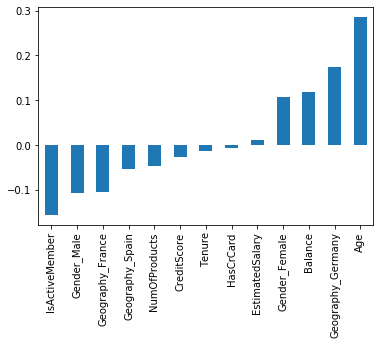

In [9]:
#Plotting correlation graph with outout variable.
df.corr()['Exited'].sort_values()[:-1].plot(kind= 'bar')

From the above graph it is clear that the Age, Geography, Balance and Gender has positive correlation and impact the output feature significantly.

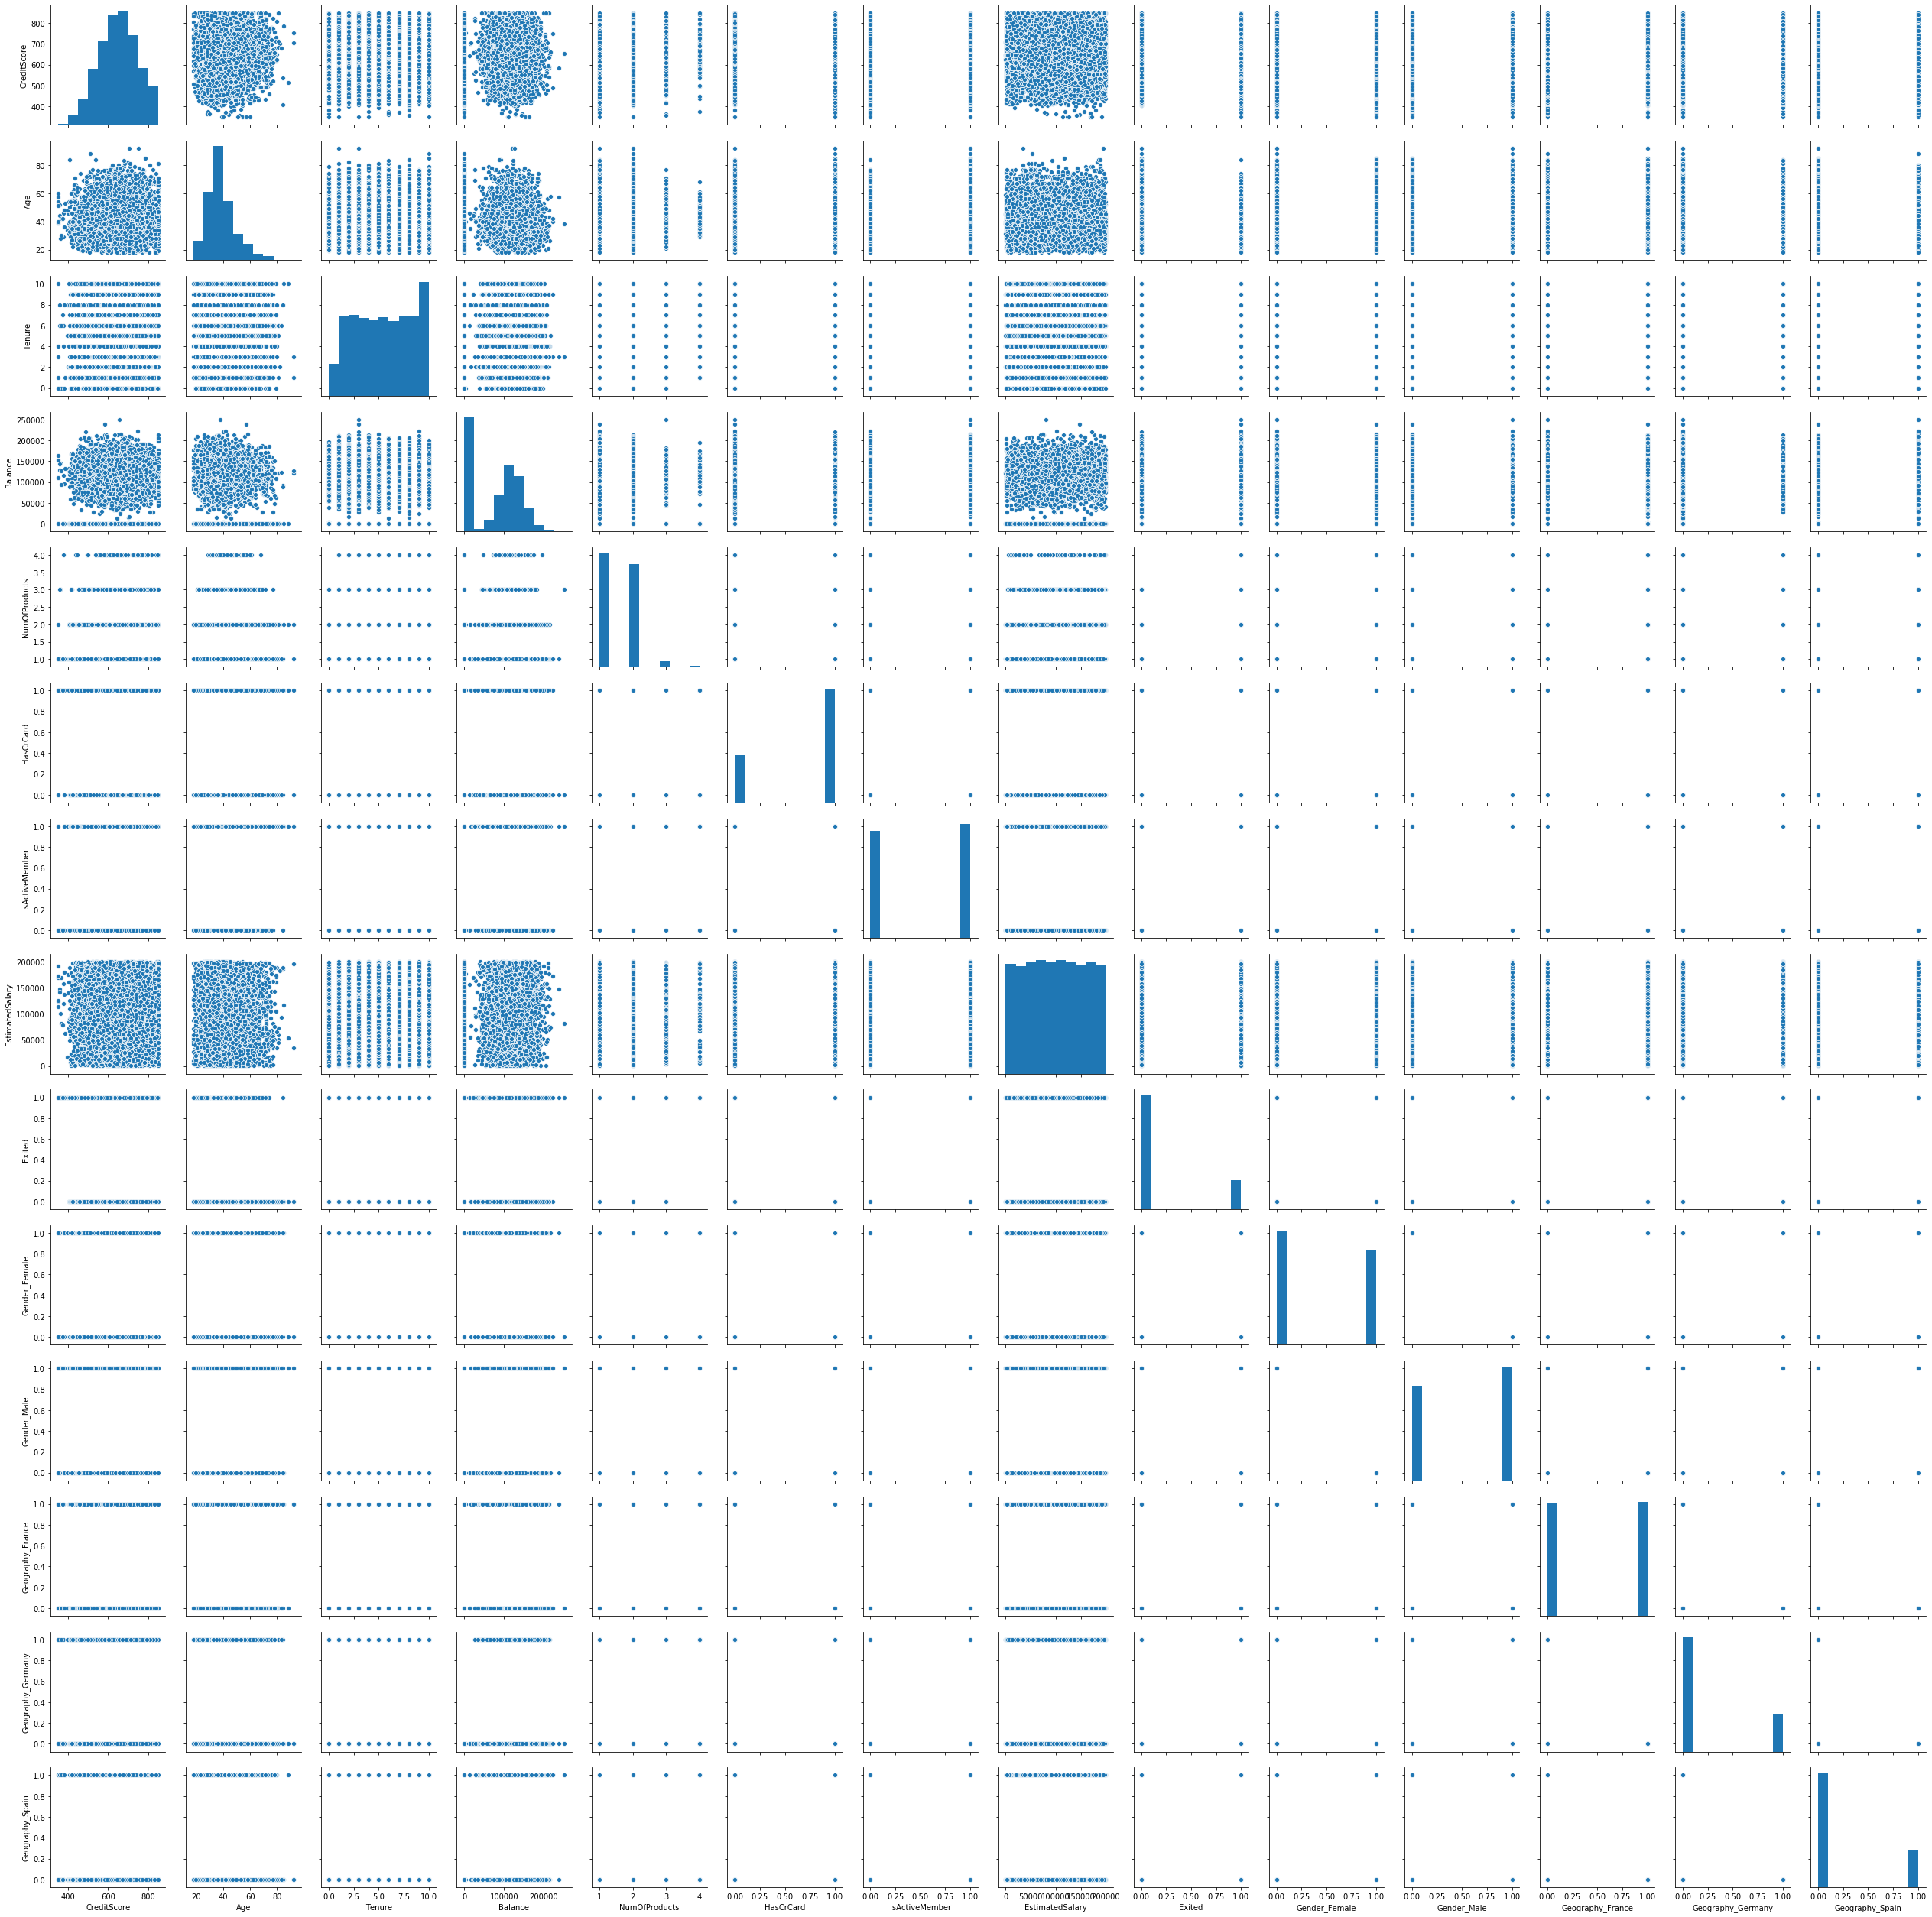

In [10]:
sns.pairplot(df)

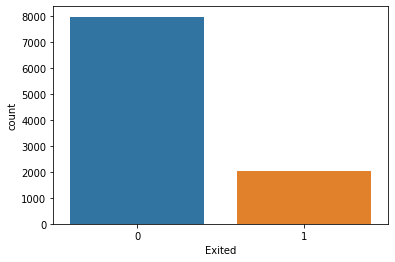

In [11]:
sns.countplot(x='Exited', data=df)

In [12]:
#Split the dataframe into feature set and target set.
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

Splitting the data into train, validation and test
To keep things simple splitting into 70:15:15

# Using Numpy splitting into train, validation and test

#This could be one way to split the data into train, validation and test .
#Note: Not executing this as using train test split for the same

np.random.seed(10) 
train, validate, test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.85*len(df))])

# Using Sklearn's train and test Split function

In [13]:
#Import train test split from Sklearn
from sklearn.model_selection import train_test_split

In [71]:
#Splitting data in to training set = 60% of the data, test set = 40% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=102)

In [72]:
#splitting the data further into Validation and Test set  = Dividing above test set into 2 parts.
testX, ValX, testY, ValY = train_test_split(X_test, y_test, test_size=0.50, random_state=25)

In [73]:
# Training data 
X_train = X_train.values
y_train = y_train.values

In [74]:
# Validation Data 
valX = ValX.values
ValY = ValY.values

In [75]:
# Test Data 
testX = testX.values
testy = testY.values

# 5. Normalize the train and test data

In [76]:
from sklearn.preprocessing import Normalizer
Norm = Normalizer()

In [77]:
Norm.fit_transform(X_train)
Norm.transform(valX)
Norm.transform(testX)

array([[4.96590744e-03, 3.08715383e-04, 2.64613185e-05, ...,
        8.82043951e-06, 8.82043951e-06, 0.00000000e+00],
       [5.40790464e-03, 3.02415720e-04, 2.66837400e-05, ...,
        8.89458000e-06, 0.00000000e+00, 8.89458000e-06],
       [7.04418900e-03, 3.91343834e-04, 8.02756582e-05, ...,
        1.00344573e-05, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.94478074e-03, 2.89463433e-04, 5.38536619e-05, ...,
        0.00000000e+00, 6.73170774e-06, 0.00000000e+00],
       [9.60981735e-03, 6.64273088e-04, 1.47616242e-05, ...,
        1.47616242e-05, 1.47616242e-05, 0.00000000e+00],
       [1.46881895e-02, 1.06278180e-03, 8.17524463e-05, ...,
        2.72508154e-05, 2.72508154e-05, 0.00000000e+00]])

# Creating model and defining configuration

In [78]:
#Initialize sequenial model
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [79]:
model = Sequential()

model.add(tf.keras.layers.Dense(100,activation= 'relu'))
model.add(tf.keras.layers.Dense(50,activation= 'relu'))
model.add(tf.keras.layers.Dense(1,activation= 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])

In [80]:
model.fit(X_train,y_train,epochs=50, validation_data=(ValX, ValY), verbose=0)

In [81]:
loss, acc = model.evaluate(ValX, ValY)
print('Accuracy: %.3f ' %acc)
print('Loss: %.3f ' %loss)

1500/1500 [==============================] - 0s 21us/sample - loss: 8.8376 - accuracy: 0.8480
Accuracy: 0.848 
Loss: 8.838 


In [82]:
loss, acc = model.evaluate(testX, testy)
print('Accuracy: %.3f ' %acc)
print('Loss: %.3f ' %loss)

1500/1500 [==============================] - 0s 22us/sample - loss: 7.8534 - accuracy: 0.8567
Accuracy: 0.857 
Loss: 7.853 


# Trying to create another instance of the Model

In [83]:
model = Sequential()

model.add(tf.keras.layers.Dense(50,activation= 'relu'))
model.add(tf.keras.layers.Dense(30,activation= 'relu'))
model.add(tf.keras.layers.Dense(1,activation= 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])

In [84]:
model.fit(x=X_train,y=y_train,epochs=50,validation_data=(ValX, ValY), verbose= 0)

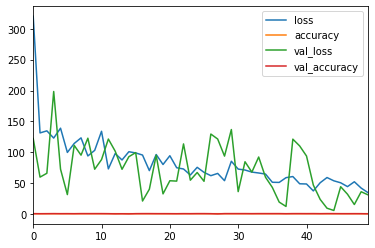

In [85]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Implementing Early stopping

In [90]:
model = Sequential()

model.add(tf.keras.layers.Dense(100,activation= 'relu'))
model.add(tf.keras.layers.Dense(75,activation= 'relu'))
model.add(tf.keras.layers.Dense(1,activation= 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])

In [91]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode= 'min', verbose = 1)

In [92]:
model.fit(x=X_train,y=y_train,epochs=50,validation_data=(ValX, ValY), verbose= 0,
          callbacks=[early_stop])

Epoch 00003: early stopping


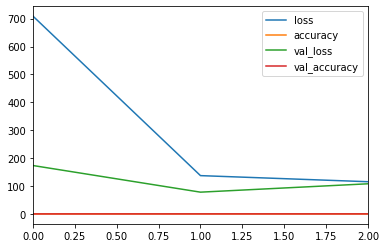

In [93]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Implementing Dropout feature

In [94]:
model = Sequential()

model.add(tf.keras.layers.Dense(50,activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(30,activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1,activation= 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])

In [95]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(ValX, ValY), verbose= 0,
          callbacks=[early_stop])

Epoch 00005: early stopping


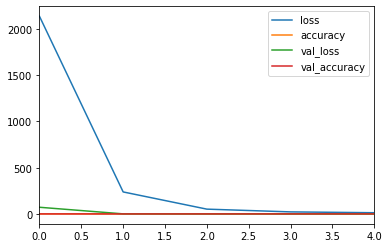

In [96]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [97]:
model_losses

,loss,accuracy,val_loss,val_accuracy
0,2137.258270,0.620143,72.484396,0.696000
1,238.178534,0.646143,1.158542,0.522000
2,52.193197,0.660286,0.626063,0.740000
3,22.403114,0.687143,0.622715,0.740000
4,13.373968,0.702286,0.625117,0.703333


In [98]:
loss, acc = model.evaluate(testX, testy)
print('Accuracy: %.3f ' %acc)
print('Loss: %.3f ' %loss)

1500/1500 [==============================] - 0s 20us/sample - loss: 0.6167 - accuracy: 0.7287
Accuracy: 0.729 
Loss: 0.617 


# Accuracy score and confusion matrix 

In [99]:
prediction = model.predict_classes(testX)
prediction

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
print(classification_report(testy, prediction))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1136
           1       0.15      0.02      0.04       364

    accuracy                           0.73      1500
   macro avg       0.45      0.49      0.44      1500
weighted avg       0.61      0.73      0.65      1500



In [102]:
print(confusion_matrix(testy, prediction))

[[1084   52]
 [ 355    9]]
